<h1 style="text-align:center;"> The Titanic Challenge </h1>

<p> The dataset consists of passangers who were on the titanic ship. Some of the passangers survived while some didn't. With the available dataset, we want to determine population of the passaners that survived and didn't survived. </p>
<p> There are several questsion we need to ask to determine what made some of the passangers survived or not </p>

<h2> Important questions we want to ask </h2>
<ol>
    <li> Total number of passangers that survived? </li.
    <li> Did the gender played a role in the survival chance? </li>
    <li> Did age played a role in survival chance </li>
    <li> Did the carbin where each passangers stayed contributed to the chances of survival? </li>

</ol>
     


We begin by importing our dataset and necessary libraries.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')
df.head()
plt.plot()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<ol> 
    <li> Who were the passengers on the titanic? (Age, Gender, Class, e.t.c) 
    </li>
    <li> What cabin were the passengers on? </li> 
    <li> Who came alone and who came with family? </li>
    <li> Where did they come from? </li>
</ol>

In [4]:
%matplotlib inline

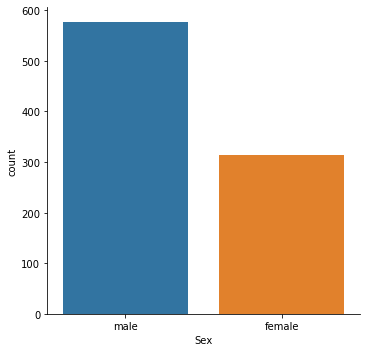

In [7]:
sns.catplot('Sex', data=df, kind='count')

First indication here is there are more males on the ship. Twice as much as females. 

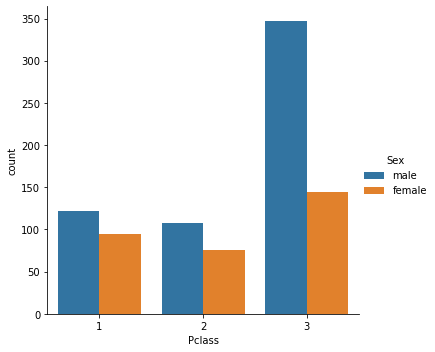

In [9]:
sns.catplot('Pclass', data=df, hue='Sex', kind='count')

The chart above indicated that there are more males in each class of ticket.

In [10]:
def male_female_child(passenger):
    passenger  = age, sex

    if age < 16:
        return 'child'
    else:
        return sex


In [11]:
df['Person'] = df[['Age', 'Sex']].apply(male_female_child, axis=1)

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


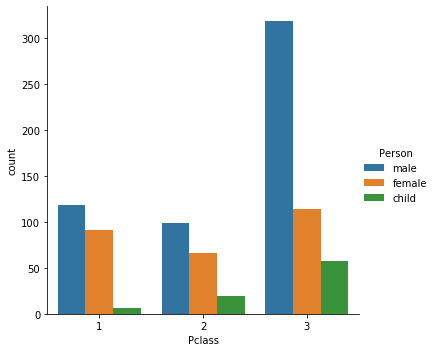

In [13]:
sns.catplot('Pclass', data=df, hue='Person', kind='count')

<p> Visual representation indicating that male passengers where the overall largest in all of the class of tickets followed by the females then the under 16 year old which are classified as children here having both gender </p> 

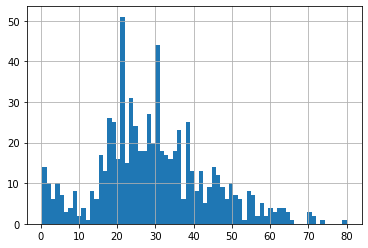

In [14]:
df['Age'].hist(bins=70)

Person
male       537
female     271
child       83


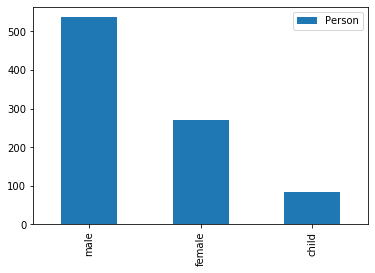

In [17]:
Pers = df['Person'].value_counts()
Pers_his = pd.DataFrame(Pers)
Pers_his.plot.bar()
print(Pers_his)

In [20]:
male_age = df['Age'][df['Sex'] == 'male'].mean()
print('The average age of males:', male_age)

The average age of males: 30.72664459161148


In [21]:
fe_age = df['Age'][df['Sex'] == 'female'].mean()
print('The average age of females: ', fe_age)

The average age of females:  27.915708812260537


In [22]:
O_age = df['Age'].mean()
print('Over all mean age: ', O_age)

Over all mean age:  29.69911764705882


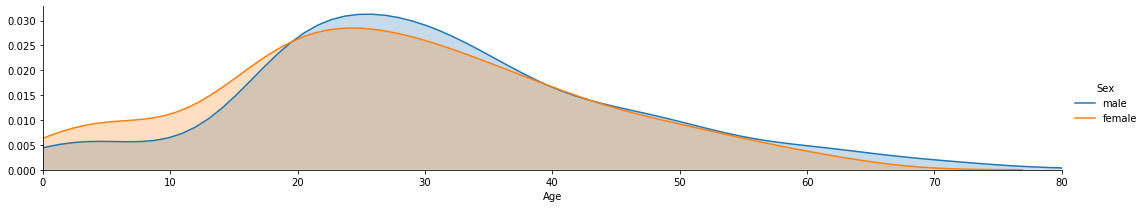

In [31]:
fg = sns.FacetGrid(df, hue='Sex', aspect =5)
fg.map(sns.kdeplot, 'Age', shade=True)
old = df['Age'].max()
fg.set(xlim=(0, old))
fg.add_legend()

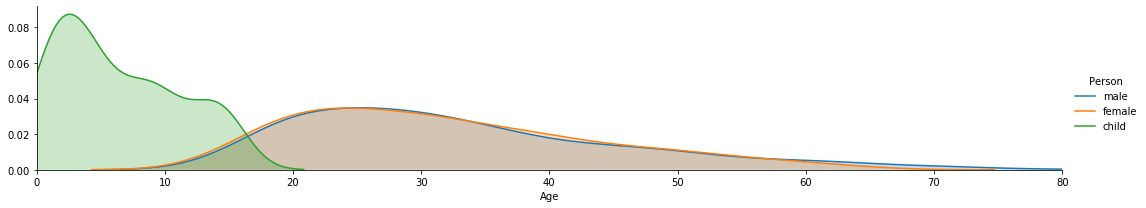

In [32]:
fg = sns.FacetGrid(df, hue='Person', aspect =5)
fg.map(sns.kdeplot, 'Age', shade=True)
old = df['Age'].max()
fg.set(xlim=(0, old))
fg.add_legend()

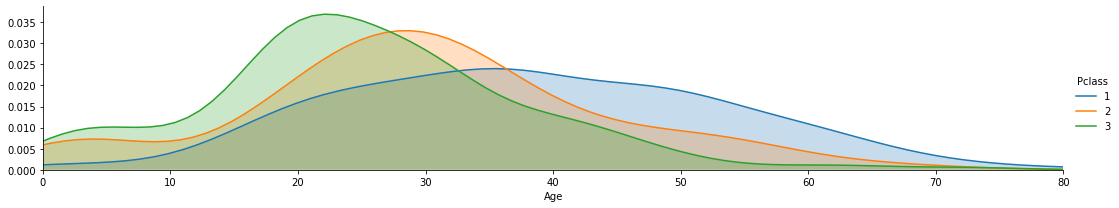

In [33]:
fg = sns.FacetGrid(df, hue='Pclass', aspect =5)
fg.map(sns.kdeplot, 'Age', shade=True)
old = df['Age'].max()
fg.set(xlim=(0, old))
fg.add_legend()

In [36]:
df[['Cabin']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Cabin   204 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


In [37]:
df.shape

(891, 13)

In [38]:
cabin = df['Cabin'].dropna()

In [49]:
level = []

for item in cabin:
    level.append(item[0])

cab_df = pd.DataFrame(level)
cab_df.columns = ['CabinL']

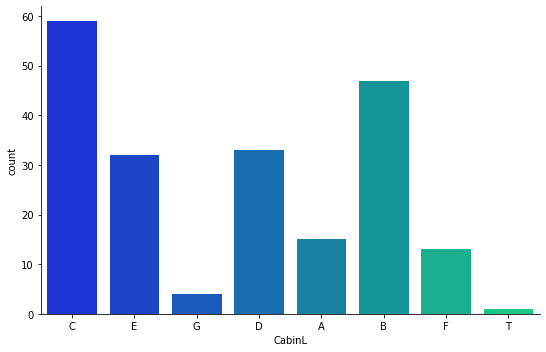

In [50]:
sns.catplot('CabinL', data= cab_df, kind ='count',aspect= 1.5, palette='winter' )

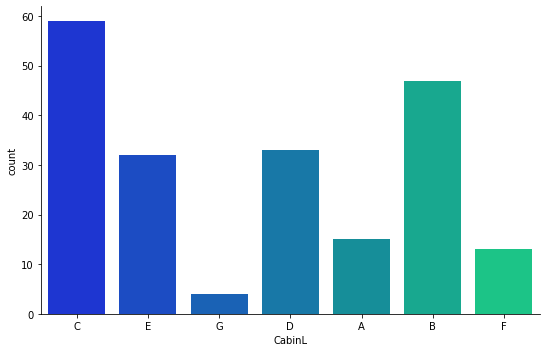

In [51]:
cab_df = cab_df[cab_df.CabinL != 'T']
sns.catplot('CabinL', data= cab_df, kind ='count',aspect= 1.5, palette='winter' )

<p> Where did the passengers come from? </p>

<p> The embarked column gives a good insight into that. The alphabets in the Embarked column represent name of the cities where they come from </p>
<p> S for Southampton, C for Cherbourg and Q is for Queenstown </p>


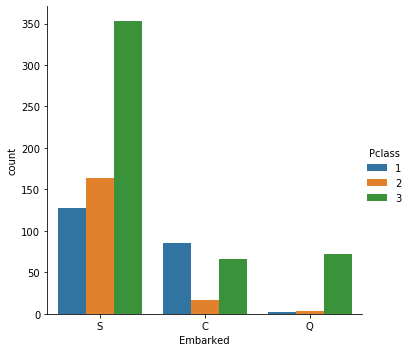

In [54]:
sns.catplot('Embarked', data=df, hue='Pclass', kind='count')

In [55]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [56]:
df['Alone'] = df['SibSp'] + df['Parch']



In [57]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,0


In [66]:
def alone_sib(stat):
    if stat == 0:
        return 'No'
    else:
        return 'Yes'


In [67]:
df['Relatives'] = df['Alone'].apply(alone_sib)

In [68]:
df['Relatives']

0      Yes
1      Yes
2       No
3      Yes
4       No
      ... 
886     No
887     No
888    Yes
889     No
890     No
Name: Relatives, Length: 891, dtype: object

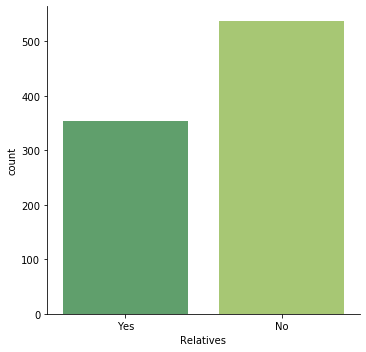

In [69]:
sns.catplot('Relatives', data=df, palette='summer', kind='count')

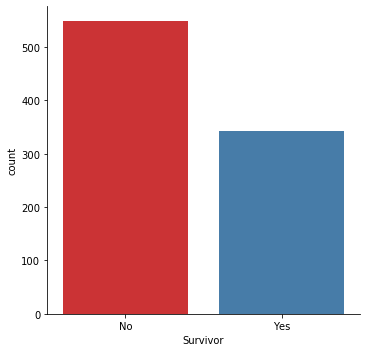

In [77]:
df['Survivor'] = df.Survived.map({0:'No', 1:'Yes'})
sns.catplot('Survivor', data=df, palette='Set1', kind='count')

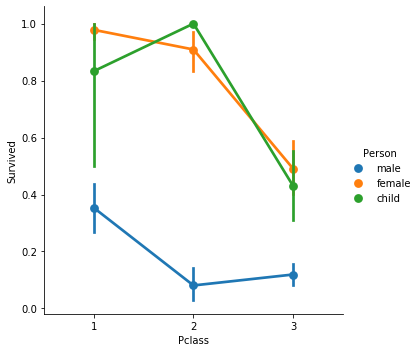

In [83]:
sns.catplot('Pclass', 'Survived', data=df, hue='Person', kind='point')

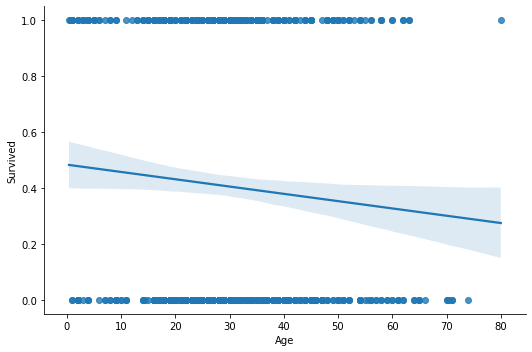

In [85]:
 sns.lmplot('Age', 'Survived', data=df, aspect=1.5)

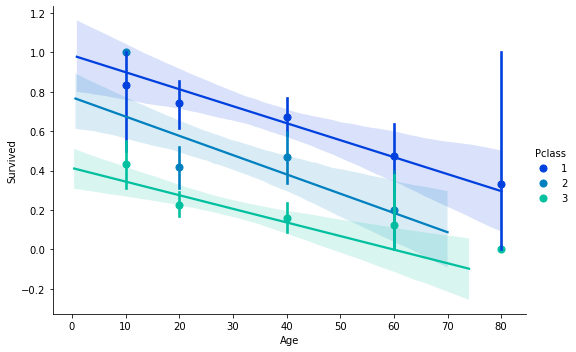

In [89]:
generations = [10, 20, 40, 60, 80]
sns.lmplot('Age', 'Survived', data=df, aspect=1.5, hue='Pclass', palette='winter', x_bins = generations)

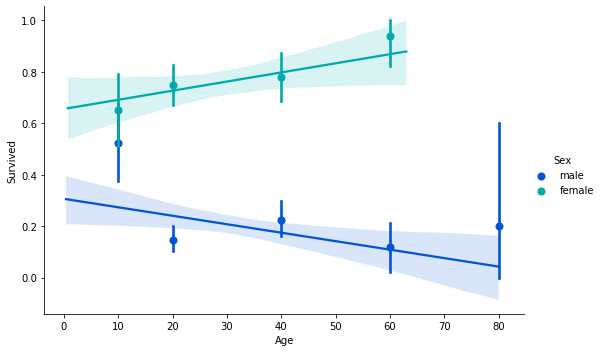

In [90]:
sns.lmplot('Age', 'Survived', data=df, aspect=1.5, hue='Sex', palette='winter', x_bins = generations)

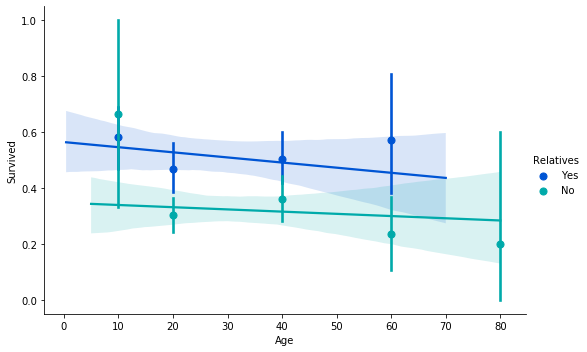

In [91]:
sns.lmplot('Age', 'Survived', data=df, aspect=1.5, hue='Relatives', palette='winter', x_bins = generations)

In [92]:
df_c_analysis = df

In [93]:
df_c_analysis.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Relatives,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,1,Yes,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1,Yes,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0,No,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1,Yes,Yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,0,No,No


In [99]:
df_c_analysis.dropna(inplace=True)

In [100]:
df_c_analysis.shape

(183, 16)

In [101]:
df_c_analysis.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Relatives,Survivor
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1,Yes,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1,Yes,Yes
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,0,No,No
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,child,2,Yes,Yes
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,female,0,No,Yes


In [102]:
def role(c):
    for i in c:
        return i[0]


In [104]:
df_c_analysis['Cabin Level'] = df_c_analysis['Cabin'].apply(role)

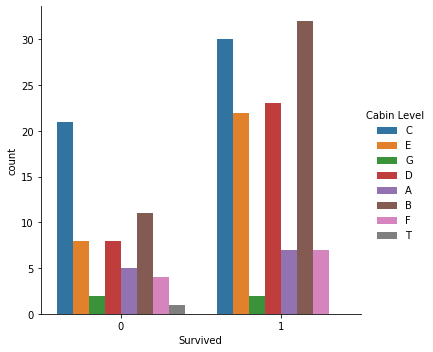

In [106]:
sns.catplot('Survived', data=df_c_analysis, hue='Cabin Level', kind='count')